In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    return 45 - integer

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos

In [3]:
df = df.drop(['golId','game','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,3,1,1.00,2.00,1,1.0,...,0.20,4.00,0,0.0,0.00,0,0.0,0.0,1,28
1,19,21,1,22,25,1,0.00,3.00,2,1.0,...,0.25,3.55,10,0.4,4.07,2,0.5,5.4,0,20
2,19,2,20,24,2,0,0.00,0.00,1,0.0,...,0.00,20.00,0,0.0,0.00,4,1.0,2.8,0,31
3,20,0,21,20,21,7,0.14,4.14,1,0.0,...,0.20,4.00,5,0.6,9.12,0,0.0,0.0,0,25
4,19,1,2,1,2,1,0.00,2.00,1,1.0,...,0.00,2.35,2,0.0,24.00,0,0.0,0.0,0,23


In [4]:
df.describe()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
count,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,...,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000
mean,9.989147,10.977793,10.738354,11.605109,12.189013,2.782768,0.378643,3.045642,3.064785,0.375410,...,0.326759,3.929274,3.095675,0.367702,4.569796,2.617966,0.361082,3.533026,0.520120,23.970279
std,9.522328,9.470272,9.449467,9.496836,9.659051,3.374538,0.379354,3.849747,3.630589,0.370087,...,0.379828,5.303191,3.702988,0.364358,5.657058,3.222798,0.377371,4.930137,0.499637,3.933369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,19.000000,19.000000,3.000000,5.000000,5.000000,2.000000,0.330000,2.250000,2.000000,0.330000,...,0.000000,2.500000,2.000000,0.330000,3.380000,2.000000,0.330000,2.280000,1.000000,24.000000
75%,19.000000,20.000000,21.000000,20.000000,22.000000,4.000000,0.670000,4.130000,5.000000,0.670000,...,0.600000,5.500000,4.000000,0.670000,6.000000,4.000000,0.670000,4.750000,1.000000,26.000000
max,21.000000,24.000000,24.000000,25.000000,27.000000,27.000000,1.000000,74.000000,29.000000,1.000000,...,1.000000,47.000000,25.000000,1.000000,58.000000,23.000000,1.000000,83.000000,1.000000,45.000000


# of red team victory:  3115
# of blue team victory:  2874


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



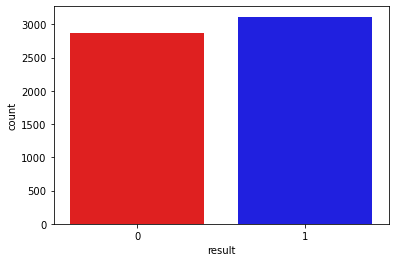

In [5]:
ax = sns.countplot(y,palette=['red','blue'])
R, B = y.value_counts()
print('# of red team victory: ', R)
print('# of blue team victory: ', B)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



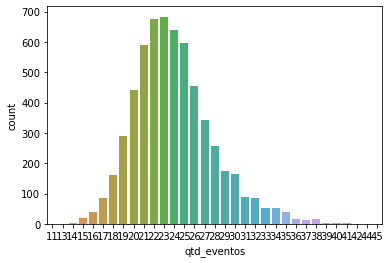

In [6]:
ax = sns.countplot(df['qtd_eventos'])

<AxesSubplot:>

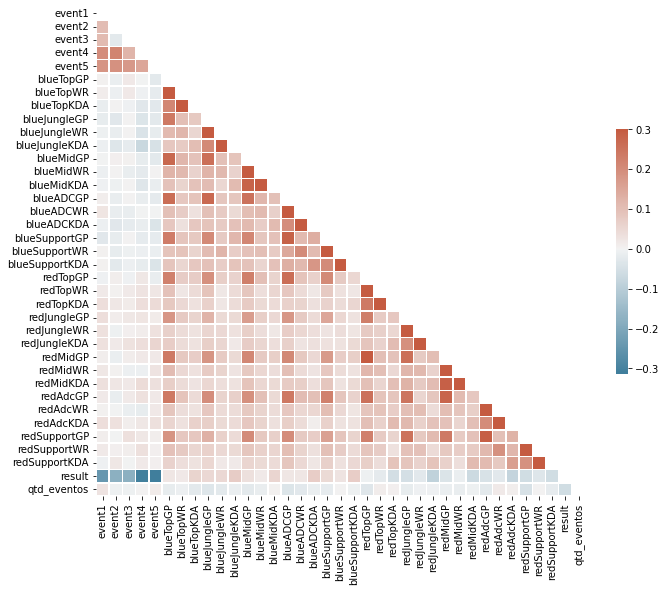

In [7]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

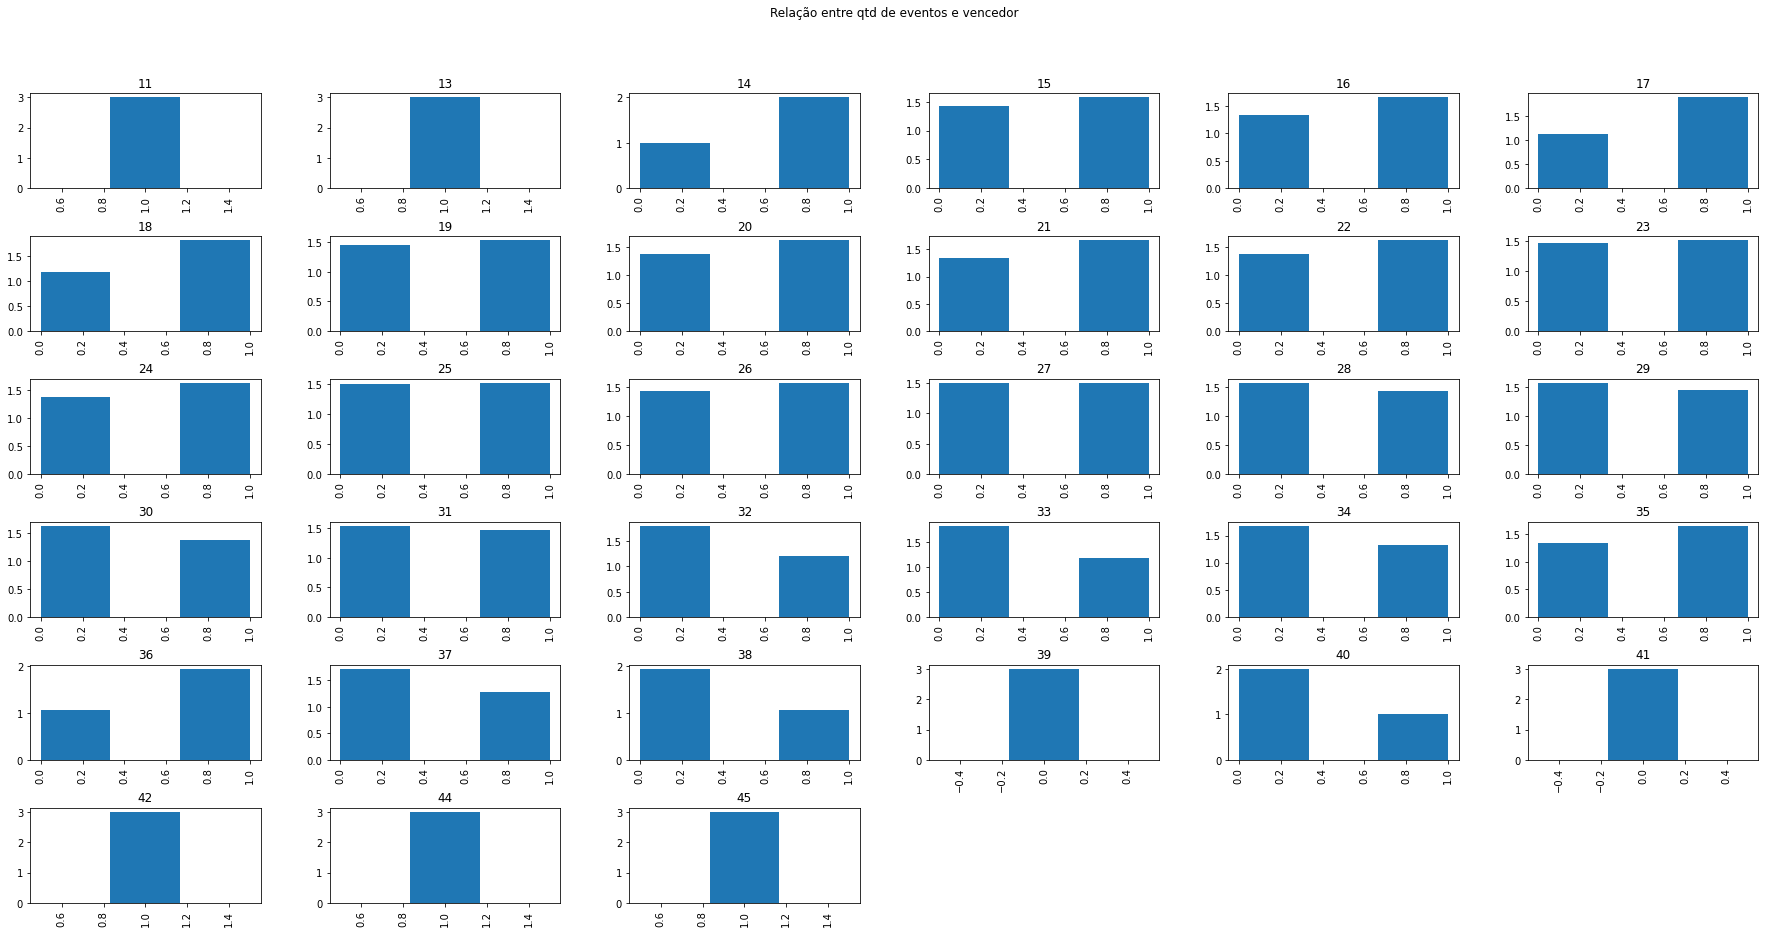

In [8]:
df.hist(column='result', by='qtd_eventos', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre qtd de eventos e vencedor')

In [9]:
features = ['event1','event2','event3', 'event4', 'event5', 'blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

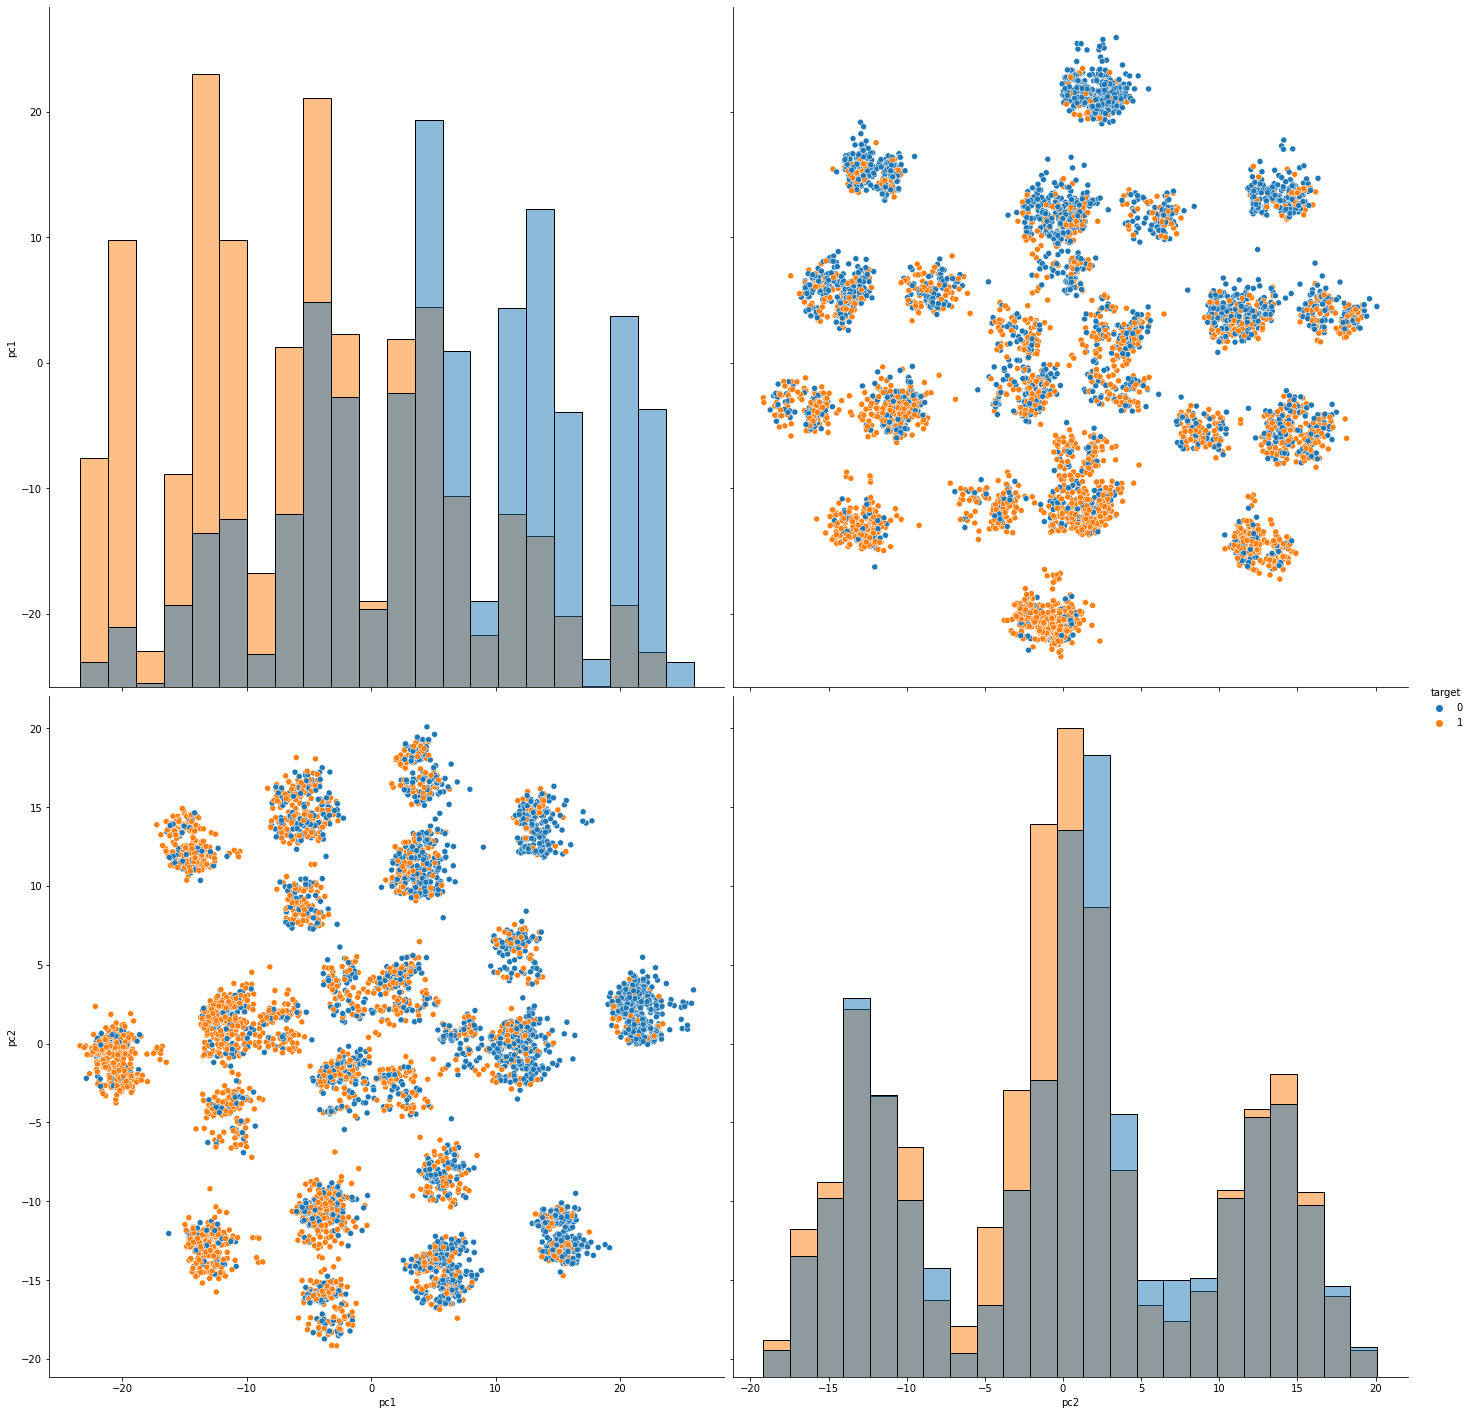

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [11]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

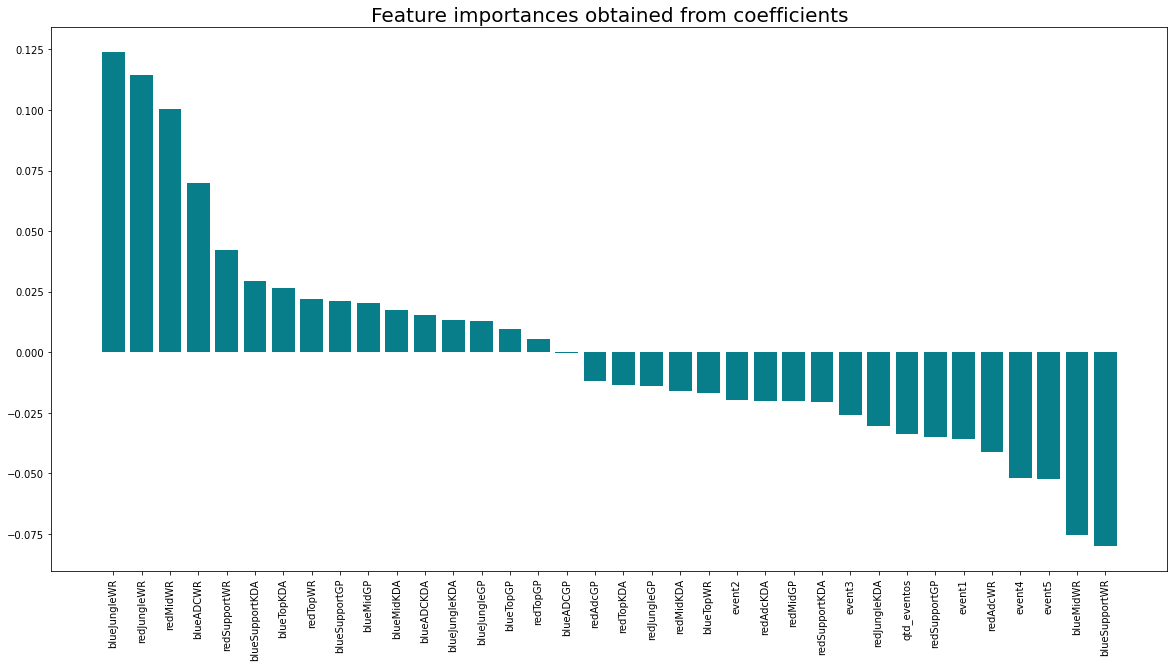

In [12]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

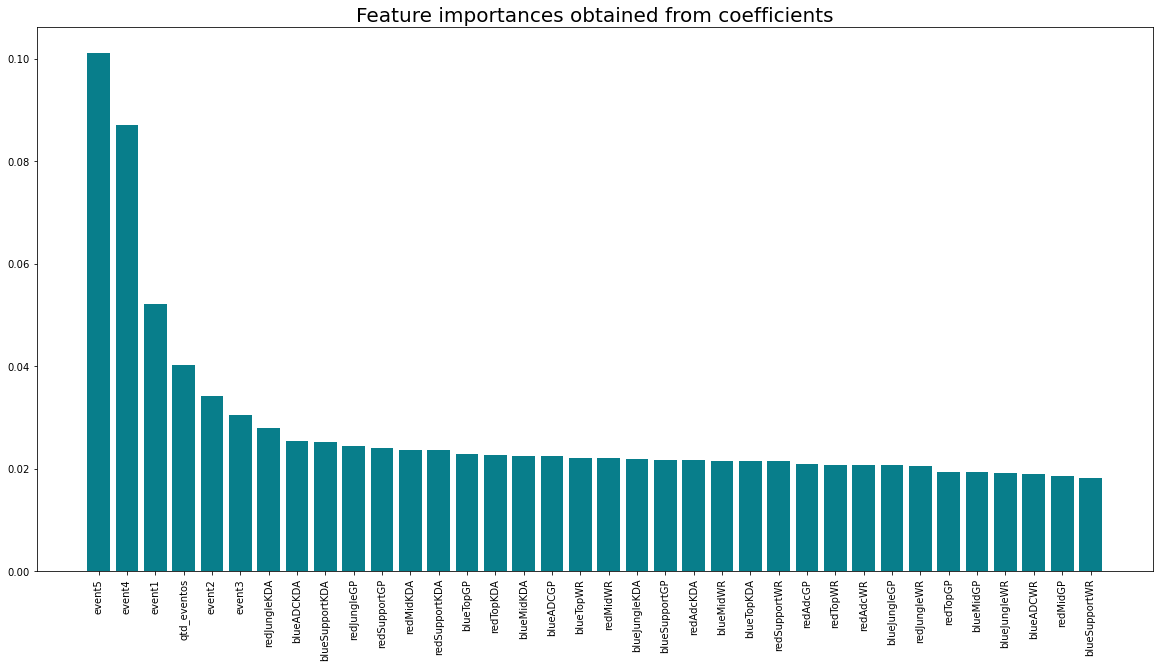

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

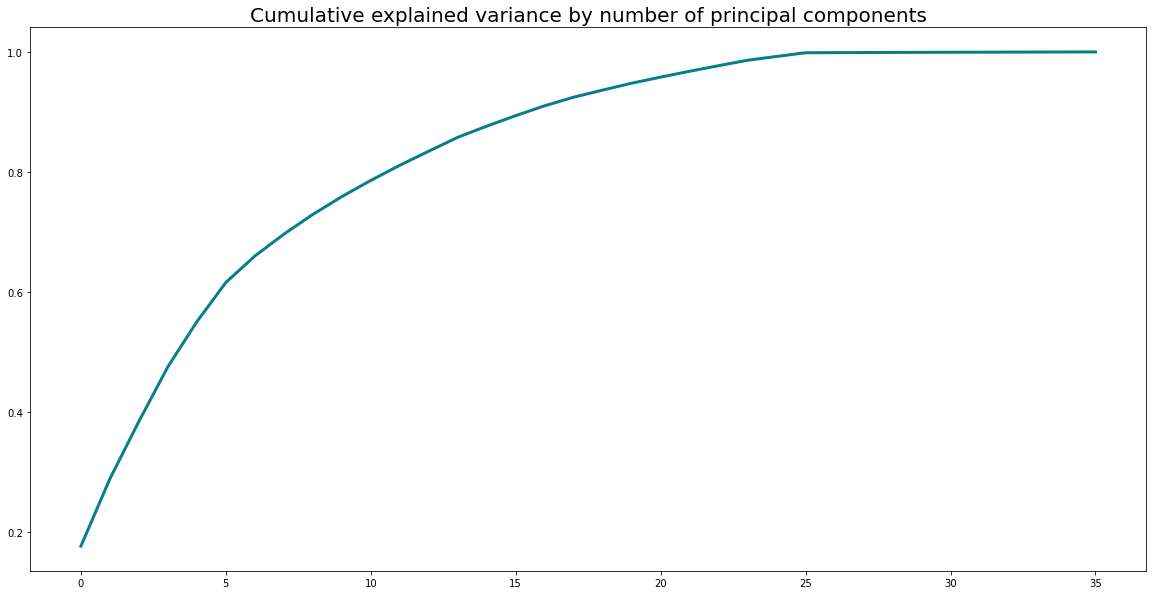

In [14]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [15]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
event1,5.513937,0.953772,5.525863,-5.034829,1.799584,-0.466805,0.061911,0.001124,-0.011322,-0.024538,...,-0.000351,-0.000045,0.000240,-0.000039,0.000211,0.000024,-0.000144,-0.000029,0.000012,-0.000136
event2,4.935745,-6.021421,-2.655785,1.094048,4.555069,-0.177567,0.139303,-0.088424,-0.042941,-0.054066,...,0.000217,0.000111,-0.000115,-0.000036,0.000021,-0.000026,0.000163,-0.000134,0.000042,0.000034
event3,3.791515,7.074806,-1.075974,3.574124,3.289881,-0.308644,0.034740,-0.065882,0.043146,0.051082,...,0.000312,0.000127,0.000005,0.000092,0.000130,0.000325,0.000149,0.000145,-0.000103,-0.000052
event4,5.956472,-1.861319,3.418523,4.979953,-3.816640,0.232517,0.210314,0.185784,0.127546,-0.093098,...,0.000149,0.000003,0.000175,0.000268,-0.000159,0.000282,-0.000094,0.000036,-0.000333,-0.000305
event5,6.309429,1.389036,-5.316332,-3.307494,-3.467585,0.426752,0.336604,-0.011182,0.049475,-0.095735,...,-0.000425,-0.000190,0.000049,-0.000265,-0.000122,-0.000153,-0.000040,0.000041,0.000094,0.000009


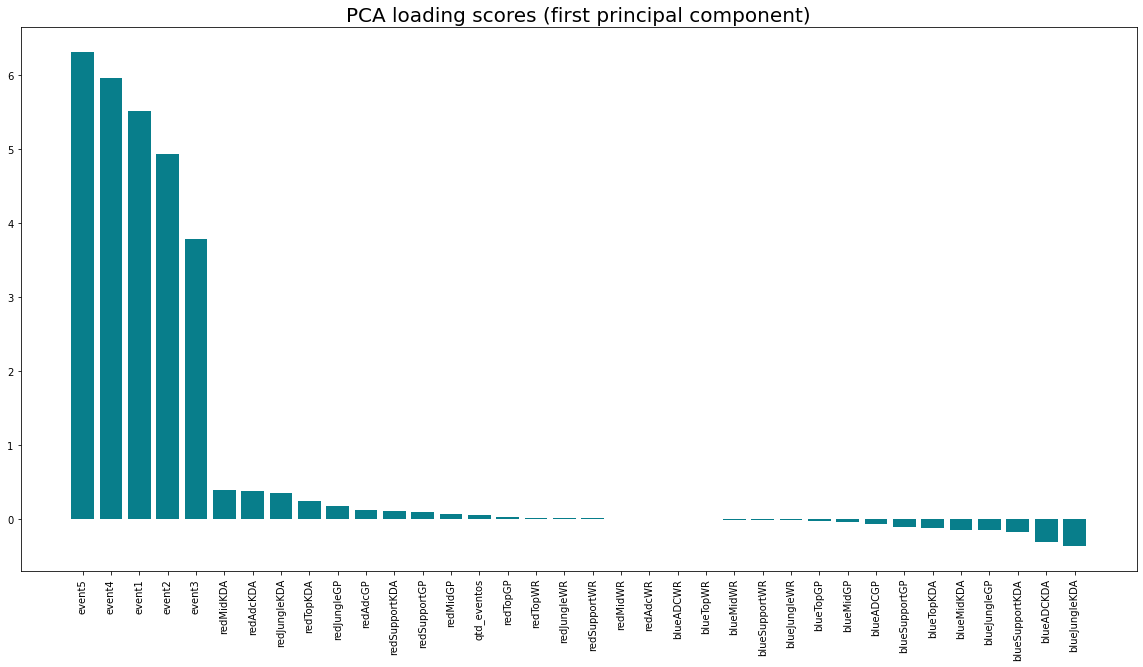

In [16]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5989 samples in 0.001s...
[t-SNE] Computed neighbors for 5989 samples in 1.161s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5989
[t-SNE] Computed conditional probabilities for sample 2000 / 5989
[t-SNE] Computed conditional probabilities for sample 3000 / 5989
[t-SNE] Computed conditional probabilities for sample 4000 / 5989
[t-SNE] Computed conditional probabilities for sample 5000 / 5989
[t-SNE] Computed conditional probabilities for sample 5989 / 5989
[t-SNE] Mean sigma: 7.596570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.230682
[t-SNE] KL divergence after 300 iterations: 1.782432
